# ExxpertSCM internship task

### Data Analytics Assigment ---- Project - 1
###  Swiggy Data Analysis

######    Project 1- Swiggy or similar platform data set. On all India basis, based on at least 3-month data
    Tasks - 1. The top 3 food ordered
    2. Top 3 Shops doing maximum business
    3. Bottom 3 rated shops
    4. Average delivery time for items in Task 1

### By Mohamad Ehthesham S

LinkedIn - https://www.linkedin.com/in/-mohamad-ehthesham/overlay/contact-info/

GitHub - https://github.com/MohamadFaiz0102

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

Data can be found here - https://www.kaggle.com/datasets/aniruddhapa/swiggy-restaurants-dataset-of-metro-cities?select=Swiggy_dataset.csv

In [2]:
db=pd.read_csv('Swiggy_dataset.csv')

In [3]:
db.head(2)

,type,id,name,uuid,city,area,avgRating,totalRatingsString,cuisines,costForTwoStrings,deliveryTime,minDeliveryTime,maxDeliveryTime,address,locality,unserviceable,veg,City2
0,F,239753,The Halal Kitchen,7bac6834-aa3a-4ee6-b504-30bc69dd3d2c,Ahmedabad,Ellisbridge,4.1,100+ ratings,['North Indian' 'Chinese' 'Afghani' 'Biryani'],₹250 FOR TWO,31,31,31,Hotel Golden plaza Opp Town Hall Nr Ellisbridg...,Paldi & Ambawadi,False,False,NaN
1,F,50934,Choice Snack Bar,d40f1d3f-f284-43dc-b30b-fb7c1ee9cf4b,Ahmedabad,Navrangpura,4.4,100+ ratings,['Beverages'],₹450 FOR TWO,33,33,33,Yamuna Building Near Swastik Cross Road C G Ro...,C G Road,False,False,NaN


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6773 entries, 0 to 6772
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                6773 non-null   object 
 1   id                  6773 non-null   int64  
 2   name                6773 non-null   object 
 3   uuid                6772 non-null   object 
 4   city                6773 non-null   object 
 5   area                6773 non-null   object 
 6   avgRating           6104 non-null   object 
 7   totalRatingsString  6773 non-null   object 
 8   cuisines            6773 non-null   object 
 9   costForTwoStrings   6773 non-null   object 
 10  deliveryTime        6773 non-null   int64  
 11  minDeliveryTime     6773 non-null   int64  
 12  maxDeliveryTime     6773 non-null   int64  
 13  address             6770 non-null   object 
 14  locality            6772 non-null   object 
 15  unserviceable       6772 non-null   object 
 16  veg   

### Nulls

In [5]:
db.isnull().sum()
# deleting uuid,avgrating, address,llocality,unserisable,veg,city2 these have null values

type                     0
id                       0
name                     0
uuid                     1
city                     0
area                     0
avgRating              669
totalRatingsString       0
cuisines                 0
costForTwoStrings        0
deliveryTime             0
minDeliveryTime          0
maxDeliveryTime          0
address                  3
locality                 1
unserviceable            1
veg                      1
City2                 6773
dtype: int64

In [6]:
# deleting unnecessary columns
# deleting type,uuid,avgrating, address,llocality,unserisable,veg,city2

db.drop(['type','uuid','address','area','locality','unserviceable','City2'],inplace=True,axis=1)

In [7]:
db.head(2)

,id,name,city,avgRating,totalRatingsString,cuisines,costForTwoStrings,deliveryTime,minDeliveryTime,maxDeliveryTime,veg
0,239753,The Halal Kitchen,Ahmedabad,4.1,100+ ratings,['North Indian' 'Chinese' 'Afghani' 'Biryani'],₹250 FOR TWO,31,31,31,False
1,50934,Choice Snack Bar,Ahmedabad,4.4,100+ ratings,['Beverages'],₹450 FOR TWO,33,33,33,False


### Cleaning the data by deleting commas and brackets 

In [8]:
db['cuisines']=db['cuisines'].str.replace('[','',regex=True);
db['cuisines']=db['cuisines'].str.replace(']','',regex=True);
db['cuisines']=db['cuisines'].str.replace("'",'',regex=True);

In [9]:
db.head(2)

,id,name,city,avgRating,totalRatingsString,cuisines,costForTwoStrings,deliveryTime,minDeliveryTime,maxDeliveryTime,veg
0,239753,The Halal Kitchen,Ahmedabad,4.1,100+ ratings,North Indian Chinese Afghani Biryani,₹250 FOR TWO,31,31,31,False
1,50934,Choice Snack Bar,Ahmedabad,4.4,100+ ratings,Beverages,₹450 FOR TWO,33,33,33,False


### Task 1

### The top 3 food ordered

In [10]:
t1=db['cuisines'].value_counts().head(5)
t1

Indian          322
Chinese         214
North Indian    204
Fast Food       189
South Indian    142
Name: cuisines, dtype: int64

#### Visuals

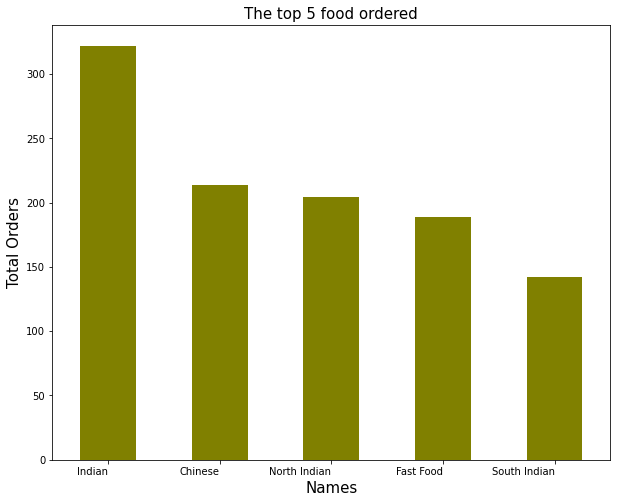

In [11]:
t1.plot(kind='bar',figsize=(10,8),color='olive')

plt.title('The top 5 food ordered',fontsize=15)

plt.ylabel('Total Orders',fontsize=15)
plt.xlabel('Names',fontsize=15)

plt.xticks(rotation=360,ha='right');

####    So Indian, North Indian , Fast Food are top orderd foods

### Task 2

In [12]:
# check uniques for costforTwo

a=db['costForTwoStrings'].unique()
# a

In [13]:
# seperating the strings from costForTwoStrings and converting to int

db['costForTwoStrings']=db['costForTwoStrings'].replace('₹','',regex=True).replace('FOR TWO','',regex=True).replace(' ','',regex=True)

db['costForTwoStrings']=db['costForTwoStrings'].astype(int)

db['costForTwoStrings'].unique()

array([ 250,  450,  600,  700,  500,  200,  800,  900,  300,  350,  650,
        199,  400, 1200,  130,  150,  550,    0,  100,  180,  750, 1500,
        120, 1000,  160,  280,  850, 1100,  149,  240,  399,    5,   50,
         80,   70,  220,  193,  499,  251,  299,  126,   99,  260,  170,
         15,  270,  326,  225,  290, 2500, 1600,  599,  129,  275, 2000,
        330,  110, 1300, 1400,   75,  197,  256, 1250,  375,  140,  230,
        137,  249,  320,  178,  384,  532,  950,  297,    1, 1900,   10,
        175,  620,   85,  340,  398,   20,   30,  190,   45, 1650,  390,
        540,   98,  159,  205,   40, 1800,   60,  105,  355,  196,  151,
        360,  420,  518, 1255,  155,  978])

In [14]:
db.head(2)

,id,name,city,avgRating,totalRatingsString,cuisines,costForTwoStrings,deliveryTime,minDeliveryTime,maxDeliveryTime,veg
0,239753,The Halal Kitchen,Ahmedabad,4.1,100+ ratings,North Indian Chinese Afghani Biryani,250,31,31,31,False
1,50934,Choice Snack Bar,Ahmedabad,4.4,100+ ratings,Beverages,450,33,33,33,False


In [15]:
# check restaraounts for max price and rating

m=db.groupby(['name','avgRating'])[['costForTwoStrings']].sum().nlargest(5,'costForTwoStrings')
m

,,costForTwoStrings
name,avgRating,
Mainland China,4.3,2600
Behrouz Biryani,4.2,2500
ITC Windsor - Gourmet Couch,4.5,2500
Malgudi - The Savera Hotel,4.1,2500
Origami Japanese & Korean Restaurant,4.4,2500


### Top 3 restaurants doing maximum business

In [16]:
# check restaraounts for max price

t2 =db.groupby(['name'])[['costForTwoStrings']].sum().nlargest(5,'costForTwoStrings')

t2
# so top 3 restaraunts doing maximum business are Mainland China, Oven Story Pizza, Behrouz Biryani

,costForTwoStrings
name,
Mainland China,4300
Barbeque Nation,4200
Oven Story Pizza,4200
Behrouz Biryani,4000
McDonald's Gourmet Burger Collection,3400


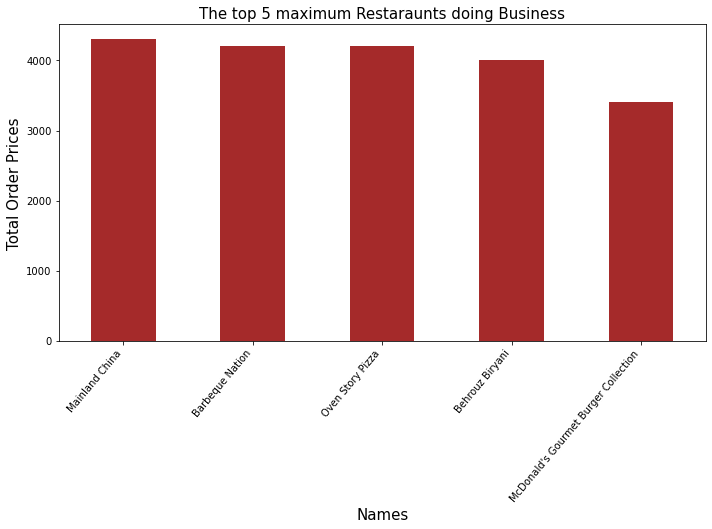

In [17]:
t2.plot(kind='bar',figsize=(10,8),color='brown',legend=None)

plt.title('The top 5 maximum Restaraunts doing Business',fontsize=15)

plt.ylabel('Total Order Prices',fontsize=15)
plt.xlabel('Names',fontsize=15)

plt.tight_layout()

plt.xticks(rotation=50,ha='right');

####    So top 3 restaraunts doing maximum business are Mainland China, Oven Story Pizza, Behrouz Biryani

### Task 3

In [18]:
nu=db['name'].value_counts()
nu.head(5)

Subway                                 9
Behrouz Biryani                        8
La Pino'z Pizza                        8
Natural Ice Cream                      7
Keventers - Milkshakes and Desserts    7
Name: name, dtype: int64

In [19]:

db[db['avgRating']=='--'].head()

,id,name,city,avgRating,totalRatingsString,cuisines,costForTwoStrings,deliveryTime,minDeliveryTime,maxDeliveryTime,veg
2063,341858,VANAKKAM,Chennai,--,Too Few Ratings,South Indian Snacks,100,52,52,52,True
2066,419784,CHENNAI FAST FOOD,Chennai,--,Too Few Ratings,Indian,160,58,58,58,False
2067,242554,Atho Man Ecstasy,Chennai,--,Too Few Ratings,Chaat Chinese Desserts Fast Food Ice Cream Ita...,300,60,60,60,False
2071,441697,SPLASH,Chennai,--,Too Few Ratings,Beverages,300,69,69,69,True
2073,453679,Creamy Cake Pops,Chennai,--,Too Few Ratings,Bakery,800,67,67,67,False


    # There are about 1949 such rows, we will drop these 1949 rows because the value for 'rate' column is '--'

In [20]:
a=db.loc[db['avgRating']=='--'].index
db.drop(a,axis=0,inplace=True)

In [21]:
# db[db['avgRating']=='--'].head()

In [22]:
# check for null vlues in ratings
db['avgRating'].isnull().sum()

669

In [23]:
# convert all null / empty values to 0 or 1 in ratings

db['avgRating']=db['avgRating'].fillna(0)


In [24]:
# converting avgRating to float
db['avgRating']=db['avgRating'].astype(float)

In [25]:
db[['totalRatingsString','avgRating']].sort_values(by='avgRating',ascending=False).head(5)

,totalRatingsString,avgRating
1774,20+ ratings,5.0
1268,20+ ratings,5.0
1125,20+ ratings,5.0
5646,20+ ratings,5.0
4813,50+ ratings,5.0


In [26]:
db['avgRating'].unique()

array([4.1, 4.4, 4. , 3.8, 0. , 4.2, 4.5, 3. , 4.6, 4.3, 2.8, 3.9, 3.3,
       4.8, 3.5, 2.9, 2.4, 2.6, 3.2, 3.6, 3.7, 4.7, 3.4, 2.7, 3.1, 4.9,
       5. , 2.5, 2.3, 2. , 2.2])

In [27]:
db[db['avgRating']==5][['name','avgRating']]

,name,avgRating
1125,Tricky Shakes,5.0
1268,CREAMS & BITES,5.0
1774,Nasi and Mee,5.0
2192,Afresh,5.0
4630,SNAXX,5.0
4632,Diamond Market Pizza JP,5.0
4813,Cafe Kokomo,5.0
4892,NIVALA APKA APNA,5.0
5646,The Asian Pavilion,5.0
5647,Get In My Belly,5.0


In [28]:
db['totalRatingsString'].unique()

array(['100+ ratings', '50+ ratings', 'Too Few Ratings', '500+ ratings',
       '20+ ratings', '1000+ ratings', '5000+ ratings'], dtype=object)

In [29]:
db[['name','avgRating']].sort_values(by='avgRating',ascending=False)

,name,avgRating
1774,Nasi and Mee,5.0
1268,CREAMS & BITES,5.0
1125,Tricky Shakes,5.0
5646,The Asian Pavilion,5.0
4813,Cafe Kokomo,5.0
...,...,...
603,Map's Meaty Paradise,0.0
601,Manna Foods,0.0
598,Er. Momo's,0.0
2019,The Great Wall of China,0.0


In [30]:
db.head(2)

,id,name,city,avgRating,totalRatingsString,cuisines,costForTwoStrings,deliveryTime,minDeliveryTime,maxDeliveryTime,veg
0,239753,The Halal Kitchen,Ahmedabad,4.1,100+ ratings,North Indian Chinese Afghani Biryani,250,31,31,31,False
1,50934,Choice Snack Bar,Ahmedabad,4.4,100+ ratings,Beverages,450,33,33,33,False


### Top 3 rated Shops

In [31]:

ab=db[(db['avgRating']==5) & (db['totalRatingsString'].isin(['50+ ratings','5000+ ratings','20+ ratings']))][['name','avgRating','totalRatingsString']].tail(5)
ab

,name,avgRating,totalRatingsString
4813,Cafe Kokomo,5.0,50+ ratings
4892,NIVALA APKA APNA,5.0,20+ ratings
5646,The Asian Pavilion,5.0,20+ ratings
5647,Get In My Belly,5.0,20+ ratings
5733,Shree Krishna Juice Bar,5.0,20+ ratings


####   So from the above result we can see that Cafe Kokomo, NIVALA APKA APNA, The Asian Pavilion are the Top 3 rated restaraunts  

### Bottom 3 rated shops

In [32]:
# Bottom 3 rated shops

db[(db['avgRating']==0) & (db['totalRatingsString']=='Too Few Ratings')][['name','avgRating','totalRatingsString']].tail(5)

# so Bottom 3 rated shops are PAPACREAM, CREAM AND FUDGE, Ammi's Biryani

,name,avgRating,totalRatingsString
2036,Mr Mrs Madharasi Cafe,0.0,Too Few Ratings
2043,SMILEY,0.0,Too Few Ratings
2045,Ammi's Biryani,0.0,Too Few Ratings
2048,CREAM AND FUDGE,0.0,Too Few Ratings
2053,PAPACREAM,0.0,Too Few Ratings


### Task 4

### Average delivery time for items in Task 1

    Indian          
    Chinese         
    North Indian    

In [33]:
db.head(2)

,id,name,city,avgRating,totalRatingsString,cuisines,costForTwoStrings,deliveryTime,minDeliveryTime,maxDeliveryTime,veg
0,239753,The Halal Kitchen,Ahmedabad,4.1,100+ ratings,North Indian Chinese Afghani Biryani,250,31,31,31,False
1,50934,Choice Snack Bar,Ahmedabad,4.4,100+ ratings,Beverages,450,33,33,33,False


#### Indian

In [34]:
# Average delivery time for items in Task 1

t4a=db[db['cuisines']=='Indian'][['deliveryTime']].mean()
t4a

deliveryTime    53.9
dtype: float64

####    So Average delivery time for Indian food is 56.65 minutes

#### Chinese

In [35]:
t4b=db[db['cuisines']=='Chinese'][['deliveryTime']].mean()
t4b

deliveryTime    56.036036
dtype: float64

#### So Average delivery time for Indian food is 56.036 minutes

#### North Indian

In [36]:
t4c=db[db['cuisines']=='North Indian'][['deliveryTime']].mean(axis=0)
t4c

deliveryTime    51.013699
dtype: float64

#### So Average delivery time for Indian food is 51.01 minutes

In [37]:
# 3 combined

t4d=db[db['cuisines'].isin(['Indian','Chinese','North Indian'])][['deliveryTime']].mean()
t4d

deliveryTime    53.505353
dtype: float64

[53.9, 56.03603603603604, 51.013698630136986]


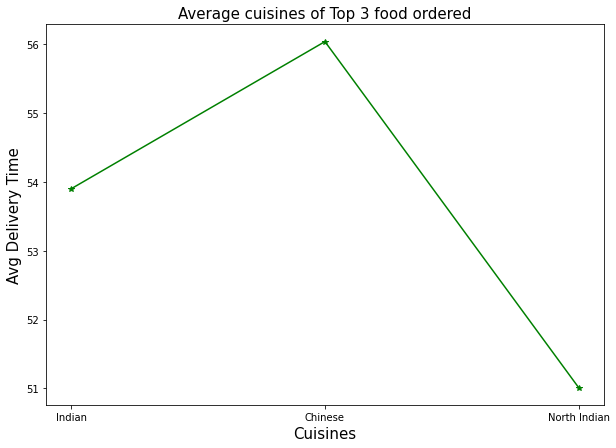

In [46]:
t4a=db[db['cuisines']=='Indian']['deliveryTime'].mean()
t4b=db[db['cuisines']=='Chinese']['deliveryTime'].mean()
t4c=db[db['cuisines']=='North Indian']['deliveryTime'].mean()

a=[t4a,t4b,t4c]
print(a)

plt.figure(figsize=(10,7))

plt.xlabel('Cuisines',fontsize=15)
plt.ylabel('Avg Delivery Time',fontsize=15)

plt.title('Average cuisines of Top 3 food ordered',fontsize=15)

plt.plot(['Indian','Chinese','North Indian'],a,color='g',marker='*');


............

                                                        Thank You 